# Game: The Hangman

## 1. Rules

Hangman is a game for two people in which one player thinks of a word and then draws a blank line on the page for each letter in the word.
The second player then tries to guess letters that might be in the word.
If the second player guesses the letter correctly, the first player writes the letter in the proper blank.
But if the second player guesses incorrectly, the first player draws a single body part of a hanging man.
The second player has to guess all the letters in the word before the hanging man is completely drawn to win the game.

## 2. Flowchart

In [1]:
from graphviz import Digraph

In [2]:
dot = Digraph(comment='Hangman Flowchart')

dot.node('START', 'START', shape='oval', style='filled', fillcolor='grey')
dot.node('Set Difficulty', 'Set Difficulty')
dot.node('Get Secret Word', 'Get Secret Word')
dot.node('Display Board', 'Display Board')
dot.node('Ask for Guess', 'Ask for Guess')
dot.node('Check Guess', 'Check Guess')
dot.node('Check Winning Condition', 'Check Winning Condition')
dot.node('Check Losing Condition', 'Check Losing Condition')

word_guessed = Digraph('Word Guessed', node_attr={'shape': 'doublecircle', 'color': 'green'})
word_guessed.node('Win','Win')
dot.subgraph(word_guessed)

word_not_guessed = Digraph('Word Not Guessed', node_attr={'shape': 'doublecircle', 'color': 'red'})
word_not_guessed.node('Lose','Lose')
dot.subgraph(word_not_guessed)

dot.node('Play Again?', 'Play Again?')
dot.node('END', 'END', shape='oval', style='filled', fillcolor='grey')

In [3]:
dot.edge('START', 'Set Difficulty')
dot.edge('Set Difficulty', 'Get Secret Word')
dot.edge('Get Secret Word', 'Display Board')
dot.edge('Display Board', 'Ask for Guess')
dot.edge('Ask for Guess', 'Check Guess')

dot.edge('Check Guess', 'Check Winning Condition', label='Guess is Correct')
dot.edge('Check Guess', 'Check Losing Condition', label='Guess is Incorrect')

dot.edge('Check Winning Condition', 'Win', label='Player Guessed all Letters')
dot.edge('Check Winning Condition', 'Display Board', label='Missing Letters')
dot.edge('Check Losing Condition', 'Lose', label='Hangman is hanged')
dot.edge('Check Losing Condition', 'Display Board', label='Hangman is not hanged yet')

dot.edge('Win', 'Play Again?')
dot.edge('Lose', 'Play Again?')
dot.edge('Play Again?', 'Get Secret Word', label='Yes')
dot.edge('Play Again?', 'END', label='No')

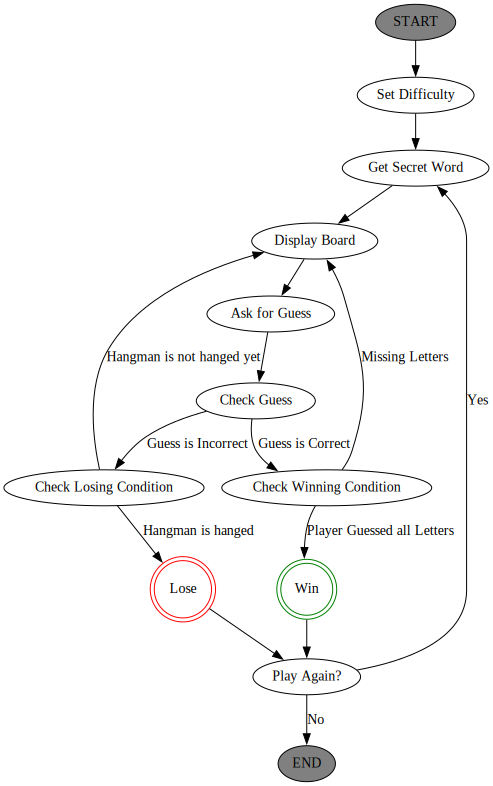

In [4]:
dot

## 3. Program

In [5]:
import random

In [6]:
# Constant '''multiline''' [list] variable declaration. Write it in UPPERCASE to distinguish them from the Variable ... variables
HANGMAN_PICS = ['''
  +---+
      |
      |
      |
     ===''', '''
  +---+
  O   |
      |
      |
     ===''', '''
  +---+
  O   |
  |   |
      |
     ===''', '''
  +---+
  O   |
 /|   |
      |
     ===''', '''
  +---+
  O   |
 /|\  |
      |
     ===''', '''
  +---+
  O   |
 /|\  |
 /    |
     ===''', '''
  +---+
  O   |
 /|\  |
 / \  |
     ===''', '''
  +---+
 [O   |
 /|\  |
 / \  |
     ===''', '''
  +---+
 [O]  |
 /|\  |
 / \  |
     ===''']

In [7]:
# A method is a function attached to a value. To call a method, you must attach it to a specific value using a period.
words = {'Colors':'red orange yellow green blue indigo violet white black brown'.split(),
'Shapes':'square triangle rectangle circle ellipse rhombus trapazoid chevron pentagon hexagon septagon octogon'.split(),
'Fruits':'apple orange lemon lime pear watermelon grape grapefruit cherry banana cantalope mango strawberry tomato'.split(),
'Animals':'bat bear beaver cat cougar crab deer dog donkey duck eagle fish frog goat leech lion lizard monkey moose mouse otter owl panda python rabbit rat shark sheep skunk squid tiger turkey turtle weasel whale wolf wombat zebra'.split()}

In [8]:
# Function returns a random string from the passed dictionary of lists of strings, and the key also.
def getRandomWord(wordDict):
    # First, randomly select a key from the dictionary:
    wordKey = random.choice(list(wordDict.keys()))
    # Second, randomly select a word from the key's list in the dictionary:
    wordIndex = random.randint(0, len(wordDict[wordKey]) - 1)

    return [wordDict[wordKey][wordIndex], wordKey]

In [9]:
# Function prints the Hangman board on the screen
def displayBoard(missedLetters, correctLetters, secretWord):
    print(HANGMAN_PICS[len(missedLetters)])
    print()

    print('Missed letters:', end=' ') 
    for letter in missedLetters:
        print(letter, end=' ')
        # end=' ' replaces the newline character that is printed after each string in the loop.
    print()

    blanks = '_' * len(secretWord)

    # Replace blanks with correctly guessed letters
    for i in range(len(secretWord)): 
        if secretWord[i] in correctLetters:
            blanks = blanks[:i] + secretWord[i] + blanks[i+1:]
    
    # Show the secret word with spaces in between each letter
    for letter in blanks: 
        print(letter, end=' ')
    print()

In [10]:
# Function returns the letter the player entered. This function makes sure the player entered a single letter and not something else.
def getGuess(alreadyGuessed):
    while True:
        print('Guess a letter.')
        guess = input()
        guess = guess.lower()
        if len(guess) != 1:
            print('Please enter a single letter.')
        elif guess in alreadyGuessed:
            print('You have already guessed that letter. Choose again.')
        elif guess not in 'abcdefghijklmnopqrstuvwxyz':
            print('Please enter a LETTER.')
        else:
            return guess
# The only way the execution will ever leave a "While True" loop is by executing 
    # 1. a _break_ statement, which leaves the loop, or 
    # 2. a _return_ statement, which leaves not just the loop but the entire function

In [11]:
# Function returns True if the player wants to play again; otherwise, it returns False.
def playAgain():
    print('Do you want to play again? (yes or no)')
    return input().lower().startswith('y')

In [12]:
print('H A N G M A N')

difficulty = '0'
while difficulty not in 'EMH':
    print('Enter difficulty: E - Easy, M - Medium, H - Hard')
    difficulty = input().upper()
if difficulty == 'M':
    del HANGMAN_PICS[8]
    del HANGMAN_PICS[7]
if difficulty == 'H':
    del HANGMAN_PICS[8]
    del HANGMAN_PICS[7]
    del HANGMAN_PICS[5]
    del HANGMAN_PICS[3]
    
missedLetters = ''
correctLetters = ''
secretWord, secretSet = getRandomWord(words)
gameIsDone = False

# The only way the execution will ever leave a "While True" loop is by executing 
    # 1. a _break_ statement, which leaves the loop, or 
    # 2. a _return_ statement, which leaves not just the loop but the entire function
    
while True:
    print('The secret word is in the set: ' + secretSet)
    displayBoard(missedLetters, correctLetters, secretWord)

    # Let the player enter a letter.
    guess = getGuess(missedLetters + correctLetters)

    if guess in secretWord:
        correctLetters = correctLetters + guess

        # Check if the player has won.
        foundAllLetters = True
        for i in range(len(secretWord)):
            if secretWord[i] not in correctLetters:
                foundAllLetters = False
                break
        if foundAllLetters:
            print('Yes! The secret word is "' + secretWord + '"! You have won!')
            gameIsDone = True
    else:
        missedLetters = missedLetters + guess

        # Check if player has guessed too many times and lost.
        if len(missedLetters) == len(HANGMAN_PICS) - 1:
            displayBoard(missedLetters, correctLetters, secretWord)
            print('You have run out of guesses!\nAfter ' + str(len(missedLetters)) + ' missed guesses and ' + str(len(correctLetters)) + ' correct guesses, the word was "' + secretWord + '"')
            gameIsDone = True

    # Ask the player if they want to play again (but only if the game is done).
    if gameIsDone:
        if playAgain():
            missedLetters = ''
            correctLetters = ''
            gameIsDone = False
            secretWord, secretSet = getRandomWord(words)
        else:
            break

H A N G M A N
Enter difficulty: E - Easy, M - Medium, H - Hard


 M


The secret word is in the set: Animals

  +---+
      |
      |
      |
     ===

Missed letters: 
_ _ _ _ _ 
Guess a letter.


 a


The secret word is in the set: Animals

  +---+
      |
      |
      |
     ===

Missed letters: 
_ _ _ _ a 
Guess a letter.


 e


The secret word is in the set: Animals

  +---+
      |
      |
      |
     ===

Missed letters: 
_ e _ _ a 
Guess a letter.


 5


Please enter a LETTER.
Guess a letter.


 ss


Please enter a single letter.
Guess a letter.


 s


The secret word is in the set: Animals

  +---+
  O   |
      |
      |
     ===

Missed letters: s 
_ e _ _ a 
Guess a letter.


 r


The secret word is in the set: Animals

  +---+
  O   |
      |
      |
     ===

Missed letters: s 
_ e _ r a 
Guess a letter.


 d


The secret word is in the set: Animals

  +---+
  O   |
  |   |
      |
     ===

Missed letters: s d 
_ e _ r a 
Guess a letter.


 c


The secret word is in the set: Animals

  +---+
  O   |
 /|   |
      |
     ===

Missed letters: s d c 
_ e _ r a 
Guess a letter.


 i


The secret word is in the set: Animals

  +---+
  O   |
 /|\  |
      |
     ===

Missed letters: s d c i 
_ e _ r a 
Guess a letter.


 u


The secret word is in the set: Animals

  +---+
  O   |
 /|\  |
 /    |
     ===

Missed letters: s d c i u 
_ e _ r a 
Guess a letter.


 t



  +---+
  O   |
 /|\  |
 / \  |
     ===

Missed letters: s d c i u t 
_ e _ r a 
You have run out of guesses!
After 6 missed guesses and 3 correct guesses, the word was "zebra"
Do you want to play again? (yes or no)


 u


## 4. Notes

### 4.1 List Data type

In [13]:
animals = ['pig','dog','cat','bird']
animals

['pig', 'dog', 'cat', 'bird']

In [14]:
animals[0]+animals[2]

'pigcat'

The in operator tells you whether a value is in a list or not. It returns a Boolean value: Yes or No.

In [15]:
'chicken' in animals

False

In [16]:
colours=['blue','red','yellow']
animals+colours

['pig', 'dog', 'cat', 'bird', 'blue', 'red', 'yellow']

String slicing

In [17]:
animals[1:3]

['dog', 'cat']

In [18]:
animals[:2]

['pig', 'dog']

In [19]:
animals[2:]

['cat', 'bird']

A method is a function attached to a value. To call a method, you must attach it to a specific value using a period.

In [20]:
# Example 1
spam = [1,2,3,4,5,6,'meow','woof']
spam.reverse()
spam

['woof', 'meow', 6, 5, 4, 3, 2, 1]

In [21]:
# Example 2
eggs = []
eggs.append('boiled')
eggs

['boiled']

In [22]:
eggs.append('fried')
eggs

['boiled', 'fried']

In [23]:
#Example 3
sentence = input()
sentence.split()

 La vie est belle


['La', 'vie', 'est', 'belle']

The function range() returns a range object of integers from 0 up to the argument. A range can be converted into a list: list() function is similar to str() or int() functions as it takes the value and return a formated one.

In [24]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [25]:
list(range(10,20))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [26]:
list('Hello')

['H', 'e', 'l', 'l', 'o']

What if we would have made it simpler with only a list instead of a dictionary?

In [27]:
words2 = 'ant baboon badger bat bear beaver camel cat clam cobra cougar coyote crow deer dog donkey duck eagle ferret fox frog goat goose hawk lion lizard llama mole monkey moose mouse mule newt otter owl panda parrot pigeon python rabbit ram rat raven rhino salmon seal shark sheep skunk sloth snake spider stork swan tiger toad trout turkey turtle weasel whale wolf wombat zebra'.split()

In [28]:
# Function returns a single secret word from the list in [wordList]
def getRandomWord2(wordList):
    # This function returns a random string from the passed list of strings.
    wordIndex = random.randint(0, len(wordList) - 1)
    return wordList[wordIndex]

### 4.2 Dictionary Data type

In [29]:
spam = {'hello':'Hello there, how are you?',4:'bacon','eggs':999}

In [30]:
spam['hello']+spam[4]

'Hello there, how are you?bacon'

In [31]:
len(spam)

3

In [32]:
for k in spam:
    print (k)

hello
4
eggs


In [33]:
for k in spam:
    print(spam[k])

Hello there, how are you?
bacon
999


In [34]:
list(spam.keys())

['hello', 4, 'eggs']

In [35]:
list(spam.values())

['Hello there, how are you?', 'bacon', 999]

In [36]:
spam2 = {'hello':['Hello there, how are you?','Fine and you'],4:['bacon','ham'],'eggs':[999,998,997]}

In [37]:
spam2['hello'][1]

'Fine and you'

In [38]:
spam2['eggs'][0]

999

In this example, the values for the keys 'key1', 'key2', and 'key3' are a list, a dictionary, and a tuple, respectively. You can access these values using the key:

In [39]:
my_dict = {'key1': [1, 2, 3], 'key2': {'subkey1': 'value1', 'subkey2': 'value2'}, 'key3': (4, 5, 6)}

In [40]:
my_dict['key1']

[1, 2, 3]

In [41]:
my_dict['key2']

{'subkey1': 'value1', 'subkey2': 'value2'}

In [42]:
my_dict['key3']

(4, 5, 6)

The difference between lists and dictionaries is that lists or ordered and dictionnaries are unordered:

In [43]:
dictionary1={'item1':'shoes','item2':'umbrella','item3':'car'}
dictionary2={'item2':'umbrella','item3':'car','item1':'shoes'}
dictionary1 == dictionary2

True

In [44]:
list1=('shoes','umbrella','car')
list2=('umbrella','car','shoes')
list1 == list2

False

### 4.3 Multiple Assignment

Multiple Assignment is a shortcut to assign multiple variables in one line of code.

Method 1:

In [45]:
spam,eggs,ham=['apples','cats',42]

In [46]:
spam+eggs+str(ham)

'applescats42'

Method 2:

In [47]:
spam=['apples','cats',42][0]
spam

'apples'

In [48]:
eggs=['apples','cats',42][1]
eggs

'cats'

In [49]:
ham=['apples','cats',42][2]
ham

42